In [1]:
from tabu_search import TabuSearch
from SA import SimulatedAnnealing
from data import FLOW, DISTANCE, TSP_17, TSP_48
import matplotlib.pyplot as plt
import numpy as np

Solving QAP

In [2]:
ts_qap = TabuSearch(
    num_items = 5,
    data = {"flow": FLOW, "distance": DISTANCE}, 
    objective_function="QAP",
)

qap_solns = []
for _ in range(10):
    soln, cost, costs = ts_qap.solve()
    qap_solns.append((soln, cost))

print(qap_solns)

[([2, 4, 5, 3, 1], 314), ([2, 4, 5, 1, 3], 404), ([3, 4, 5, 2, 1], 314), ([3, 2, 5, 4, 1], 336), ([3, 1, 4, 5, 2], 336), ([2, 4, 5, 3, 1], 314), ([3, 1, 4, 5, 2], 336), ([4, 2, 5, 3, 1], 342), ([3, 1, 5, 2, 4], 330), ([4, 2, 5, 3, 1], 342)]


Travelling Salesman Problem - 17 Cities

In [3]:
ts = TabuSearch(
    num_items = 17,
    data = TSP_17,
    objective_function="TSP",
    timer = None,
    bias_factor=2,
    max_iterations=1000,
    print_logs = False
)

tsp_solns = []
for _ in range(10):
    soln, cost, costs = ts.solve()
    tsp_solns.append((soln, cost))

print(tsp_solns)

[([5, 2, 10, 9, 12, 16, 1, 4, 13, 7, 8, 6, 17, 14, 15, 3, 11], 2149), ([1, 7, 8, 6, 3, 11, 5, 2, 10, 15, 14, 17, 13, 4, 9, 12, 16], 2090), ([2, 10, 6, 9, 12, 16, 1, 4, 13, 7, 17, 8, 14, 3, 15, 11, 5], 2304), ([15, 14, 17, 13, 4, 9, 12, 16, 1, 7, 8, 6, 3, 11, 5, 2, 10], 2090), ([10, 11, 6, 7, 8, 17, 4, 9, 12, 16, 1, 13, 14, 15, 3, 5, 2], 2257), ([6, 9, 12, 16, 1, 4, 13, 7, 17, 8, 14, 3, 15, 11, 5, 2, 10], 2304), ([13, 1, 16, 12, 9, 5, 2, 10, 11, 3, 15, 14, 6, 8, 17, 7, 4], 2104), ([9, 4, 13, 17, 14, 3, 10, 2, 5, 11, 15, 6, 8, 7, 1, 16, 12], 2170), ([17, 3, 11, 5, 2, 10, 15, 14, 8, 1, 16, 12, 9, 4, 13, 6, 7], 2243), ([10, 2, 5, 9, 12, 16, 1, 17, 7, 4, 13, 8, 6, 14, 15, 3, 11], 2187)]


In [4]:
sa = SimulatedAnnealing(
    num_items = 17,
    objective_function = "tsp",
    data = TSP_17,
    temp_iter = 30, temp = 100,
    t_stop = 0,
    print_logs = False,
    timer=None
)

tsp_sa_solns = []
for _ in range(10):
    soln, cost, costs = sa.solve()
    tsp_sa_solns.append((soln, cost))
    

print(tsp_sa_solns)

[([12, 9, 5, 2, 10, 11, 3, 15, 14, 6, 8, 7, 17, 13, 4, 1, 16], 2096), ([4, 1, 16, 12, 9, 5, 2, 10, 11, 3, 15, 14, 6, 8, 17, 7, 13], 2095), ([15, 10, 2, 5, 11, 3, 6, 17, 8, 7, 1, 16, 12, 9, 4, 13, 14], 2121), ([13, 4, 9, 12, 16, 1, 7, 8, 6, 3, 11, 5, 2, 10, 15, 14, 17], 2090), ([14, 17, 1, 16, 12, 9, 4, 13, 7, 8, 6, 10, 2, 5, 11, 3, 15], 2184), ([6, 13, 4, 9, 12, 16, 1, 7, 8, 17, 14, 15, 3, 11, 10, 2, 5], 2181), ([17, 8, 6, 14, 15, 3, 5, 2, 10, 11, 9, 12, 16, 4, 13, 1, 7], 2171), ([17, 14, 15, 3, 11, 10, 2, 5, 9, 12, 16, 1, 4, 13, 7, 8, 6], 2085), ([1, 16, 12, 9, 4, 6, 3, 11, 5, 2, 10, 15, 14, 17, 8, 7, 13], 2167), ([11, 3, 6, 8, 9, 12, 16, 1, 4, 13, 7, 17, 14, 15, 10, 2, 5], 2167)]


Comparative Analysis by plotting Cost vs Number of solutions evaluated

In [5]:
sa2 = SimulatedAnnealing(
    num_items = 48,
    objective_function = "tsp",
    data = TSP_48,
    temp_iter = 50, temp = 1000,
    t_stop = 0,
    timer=None,
    print_logs = False,
)
sa2_soln, sa2_cost, sa2_costs = sa2.solve(initial_soln=list(range(1, 49)))


In [6]:
ts2 = TabuSearch(
    num_items = 48,
    data = TSP_48,
    objective_function="TSP",
    max_iterations=1000,
    timer=None,
    print_logs = False
)
ts2_soln, ts2_cost, ts2_costs = ts2.solve(initial_soln=list(range(1, 49)))

714


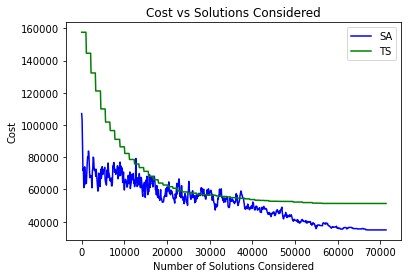

In [7]:
n = min(len(sa2_costs), len(ts2_costs))

x = np.arange(start=0, stop=100 * n, step=100)
y_sa = np.array(sa2_costs)

y_ts = np.array(ts2_costs[:n])
print(len(y_ts))

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y_sa, color='blue', label='SA')
ax.plot(x, y_ts, color='green', label='TS')

plt.legend()
plt.xlabel("Number of Solutions Considered")
plt.ylabel("Cost")
plt.title("Cost vs Solutions Considered")

plt.show()

Comparative Analysis by comparing Cost vs Time Threshold

Get times for TS

In [8]:
ts_times = []
for t in np.arange(start=0.1, stop=1.4, step=0.1):
    ts_time = TabuSearch(
        num_items = 48,
        data = TSP_48,
        objective_function="TSP",
        max_iterations=1000,
        timer=t,
        print_logs = False
    )
    soln, cost = ts_time.solve(initial_soln=list(range(1, 49)))
    ts_times.append(cost)

Timer Length: 0.1
Actual time elapsed: 0.0
Timer Length: 0.2
Actual time elapsed: 0.0
Timer Length: 0.30000000000000004
Actual time elapsed: 0.0
Timer Length: 0.4
Actual time elapsed: 0.0
Timer Length: 0.5
Actual time elapsed: 0.0
Timer Length: 0.6
Actual time elapsed: 0.0
Timer Length: 0.7000000000000001
Actual time elapsed: 0.0
Timer Length: 0.8
Actual time elapsed: 0.0
Timer Length: 0.9
Actual time elapsed: 0.0
Timer Length: 1.0
Actual time elapsed: 0.0
Timer Length: 1.1
Actual time elapsed: 0.0
Timer Length: 1.2000000000000002
Actual time elapsed: 0.0
Timer Length: 1.3000000000000003
Actual time elapsed: 0.0


Get times for SA

In [9]:
sa_times = []
for t in np.arange(start=0.1, stop=1.4, step=0.1):
    sa_time =  SimulatedAnnealing(
        num_items = 48,
        objective_function = "tsp",
        data = TSP_48,
        temp_iter = 50, temp = 1000,
        t_stop = 0,
        timer=t,
        print_logs = False,
    )
    soln, cost = sa_time.solve(initial_soln=list(range(1, 49)))
    sa_times.append(cost)
sa_times

Timer Length: 0.1
Actual time elapsed: 0.0
Timer Length: 0.2
Actual time elapsed: 0.0
Timer Length: 0.30000000000000004
Actual time elapsed: 0.0
Timer Length: 0.4
Actual time elapsed: 0.0
Timer Length: 0.5
Actual time elapsed: 0.0
Timer Length: 0.6
Actual time elapsed: 0.0
Timer Length: 0.7000000000000001
Actual time elapsed: 0.0
Timer Length: 0.8
Actual time elapsed: 0.0
Timer Length: 0.9
Actual time elapsed: 0.0
Timer Length: 1.0
Actual time elapsed: 0.0
Timer Length: 1.1
Actual time elapsed: 0.0
Timer Length: 1.2000000000000002
Actual time elapsed: 0.0
Timer Length: 1.3000000000000003
Actual time elapsed: 0.0


[74545,
 72618,
 57792,
 60742,
 59678,
 50078,
 48858,
 51287,
 45825,
 47937,
 41888,
 39612,
 36379]

13


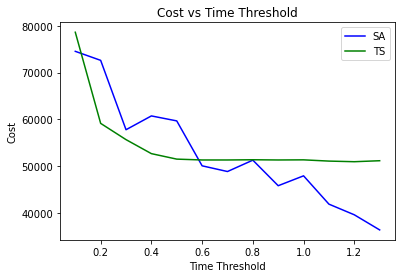

In [10]:
x = np.arange(start=0.1, stop=1.4, step=0.1)
y_sa = np.array(sa_times)

y_ts = np.array(ts_times)
print(len(y_ts))

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y_sa, color='blue', label='SA')
ax.plot(x, y_ts, color='green', label='TS')

plt.legend()
plt.xlabel("Time Threshold")
plt.ylabel("Cost")
plt.title("Cost vs Time Threshold")

plt.show()

Run both TS and SA from 25 random initial points and record the final costs

In [11]:
ts48 = TabuSearch(
    num_items = 48,
    data = TSP_48,
    objective_function="TSP",
    timer = None,
    bias_factor=2,
    max_iterations=1000,
    print_logs = False
)

tsp48_solns = []
for _ in range(25):
    soln, cost, costs = ts48.solve()
    tsp48_solns.append(cost)

print(tsp48_solns)

In [ ]:
sa48 = SimulatedAnnealing(
    num_items = 48,
    objective_function = "tsp",
    data = TSP_48,
    temp_iter = 50, temp = 1000,
    t_stop = 0,
    timer=None,
    print_logs = False,
)
sa48_solns = []
for _ in range(25):
    soln, cost, costs = sa48.solve()
    sa48_solns.append(cost)

print(sa48_solns)